In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pycaret

     |████████████████████████████████| 261 kB 390 kB/s 
     |████████████████████████████████| 14.2 MB 6.7 MB/s 
     |████████████████████████████████| 6.8 MB 8.5 MB/s 
     |████████████████████████████████| 102 kB 12.0 MB/s 
     |████████████████████████████████| 167 kB 11.2 MB/s 
     |████████████████████████████████| 24.2 MB 17.1 MB/s 
     |████████████████████████████████| 1.1 MB 21.2 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 79 kB 5.8 MB/s 
     |████████████████████████████████| 1.7 MB 20.3 MB/s 
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 1.7 MB 20.2 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=121329e90a980e6cf196796986b1cd61b892357b2a375b805a7704dbd38c7ea1
  Sto

In [3]:
dataset = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
#splitting the data into test and train

data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (288, 14)
Unseen Data For Predictions: (15, 14)


In [5]:
#importing all the classification functions from pycaret classification module
from pycaret.classification import *

In [6]:
#setting up the data
df_setup = setup(data = dataset, target = 'output', silent = True)

,Description,Value
0,session_id,3097
1,Target,output
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
#pycaret automatically compares the accuracy of all the classification algorithms
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8582,0.9248,0.8871,0.8619,0.8713,0.7131,0.7204,1.0800
ridge,Ridge Classifier,0.8580,0.0000,0.8871,0.8600,0.8711,0.7126,0.7181,0.0080
lda,Linear Discriminant Analysis,0.8532,0.9184,0.8871,0.8542,0.8678,0.7028,0.7090,0.0100
rf,Random Forest Classifier,0.8437,0.9162,0.8871,0.8472,0.8613,0.6835,0.6977,0.2940
lightgbm,Light Gradient Boosting Machine,0.8392,0.8991,0.8508,0.8661,0.8506,0.6755,0.6910,0.1110
lr,Logistic Regression,0.8390,0.9267,0.8689,0.8484,0.8555,0.6724,0.6793,0.3780
xgboost,Extreme Gradient Boosting,0.8344,0.9073,0.8508,0.8524,0.8462,0.6662,0.6774,8.5140
et,Extra Trees Classifier,0.8249,0.9106,0.8697,0.8227,0.8427,0.6444,0.6525,0.2770
ada,Ada Boost Classifier,0.8102,0.8706,0.8242,0.8404,0.8251,0.6157,0.6316,0.0490
gbc,Gradient Boosting Classifier,0.8058,0.9042,0.8250,0.8303,0.8214,0.6084,0.6216,0.0460


In [8]:
print(best_model)

In [9]:
#creating the model using Random Forest
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8636,0.9167,0.8333,0.9091,0.8696,0.7273,0.7303
1,0.9545,0.9917,1.0000,0.9231,0.9600,0.9076,0.9115
2,0.8095,0.9091,0.8182,0.8182,0.8182,0.6182,0.6182
3,0.9048,0.9273,1.0000,0.8462,0.9167,0.8073,0.8228
4,0.8095,0.8500,0.9091,0.7692,0.8333,0.6147,0.6264
5,0.9524,0.9727,0.9091,1.0000,0.9524,0.9050,0.9091
6,0.7143,0.9909,1.0000,0.6471,0.7857,0.4112,0.5087
7,0.8571,0.9091,0.8182,0.9000,0.8571,0.7149,0.7182
8,0.7143,0.7639,0.7500,0.7500,0.7500,0.4167,0.4167
9,0.8571,0.9306,0.8333,0.9091,0.8696,0.7123,0.7156


In [10]:
#tuning the model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8636,0.9250,0.8333,0.9091,0.8696,0.7273,0.7303
1,0.9545,0.9833,1.0000,0.9231,0.9600,0.9076,0.9115
2,0.8095,0.8909,0.8182,0.8182,0.8182,0.6182,0.6182
3,0.9524,0.9273,1.0000,0.9167,0.9565,0.9041,0.9083
4,0.8095,0.8273,0.9091,0.7692,0.8333,0.6147,0.6264
5,0.9524,0.9727,0.9091,1.0000,0.9524,0.9050,0.9091
6,0.8095,0.9818,1.0000,0.7333,0.8462,0.6111,0.6633
7,0.8571,0.9364,0.8182,0.9000,0.8571,0.7149,0.7182
8,0.8095,0.8241,0.9167,0.7857,0.8462,0.6000,0.6124
9,0.8571,0.9259,0.8333,0.9091,0.8696,0.7123,0.7156


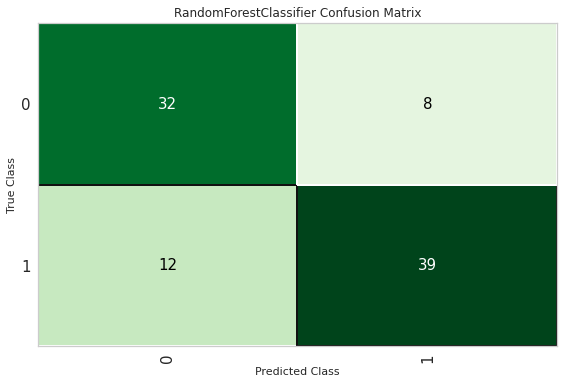

In [11]:
#plotting the confusion matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

In [12]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7802,0.8858,0.7647,0.8298,0.7959,0.5587,0.5609


In [13]:
final_rf = finalize_model(tuned_rf)

In [14]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=3097, verbose=0,
                       warm_start=False)


In [15]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9560,0.9853,0.9608,0.9608,0.9608,0.9108,0.9108


In [16]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Label,Score
0,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,1,0.7029
1,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,1,0.5808
2,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1,0,0.5641
3,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1,1,0.7978
4,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1,1,0.6772


In [17]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['output'], unseen_predictions['Label'], metric = 'Accuracy')

0.8